# D200, Problem Set 3: Neural Network

Due: 4 March 2025 [here](https://classroom.github.com/a/XQIxk9HF) in
groups of 4.

Stefan Bucher

This problem set considers another central tenet of economics:
decision-making under uncertainty. We will use the `choices13k` dataset
of [Peterson et al. (Science
2021)](https://www.science.org/doi/10.1126/science.abe2629) to explore
how human subjects make decisions when faced with risky gambles. The
data set is available and described at
<https://github.com/jcpeterson/choices13k>.

The data consist of choice frequencies of human subjects on more than
13,000 choice problems. On each choice problem, subjects chose between

-   Gamble `A`, yielding `$Ha` with probability `pHa` and `$La`
    otherwise
-   Gamble `B`, yielding lottery `Lot` (of expected value `Hb`) with
    probability `pHb` and `$Lb` otherwise. `Lot` has `LotNum` possible
    outcomes, with a distribution defined by `LotShape` (`1`: symmetric,
    `2`: right-skewed, `3`: left-skewed, `0`: n/a). This distribution is
    disclosed if `Amb=0` and remains ambiguous if `Amb=1`.

`Corr` is the sign of the correlation between the outcomes of the two
gambles. `feedback` is a boolean describing whether or not participants
observed the outcomes of the chosen as well as the non-chosen gambles.

# Problem 1

**(1a)** Load the `choices13k` dataset and join its two DataFrames as
shown below.

In [4]:
import pandas as pd
c13k = pd.read_csv("./c13k_selections.csv")
c13k_problems = pd.read_json("./c13k_problems.json", orient='index')
df = c13k.join(c13k_problems, how="left")

display(df[["Problem", "n", "bRate", "A", "B", "Amb", "Corr", "Feedback"]])

,Problem,n,bRate,A,B,Amb,Corr,Feedback
0,1,15,0.626667,"[[0.9500000000000001, 26.0], [0.05, -1.0]]","[[0.9500000000000001, 21.0], [0.05, 23.0]]",False,0,True
1,2,15,0.493333,"[[0.6000000000000001, 14.0], [0.4, -18.0]]","[[0.75, -5.0], [0.25, 8.0]]",True,-1,True
2,3,17,0.611765,"[[0.5, 2.0], [0.5, 0.0]]","[[1.0, 1.0]]",False,0,True
3,4,18,0.222222,"[[0.05, 37.0], [0.9500000000000001, 8.0]]","[[0.75, -31.0], [0.125, 86.5], [0.125, 87.5]]",False,0,True
4,5,15,0.586667,"[[1.0, 26.0], [0.0, 26.0]]","[[0.25, -36.0], [0.375, 41.0], [0.1875, 43.0],...",False,0,False
...,...,...,...,...,...,...,...,...
14563,13002,15,0.367619,"[[1.0, 30.0], [0.0, 30.0]]","[[0.199999999999999, 0.0], [0.8, 42.0]]",True,0,True
14564,13003,15,0.760000,"[[0.5, 70.0], [0.5, -42.0]]","[[0.199999999999999, 7.0], [0.8, 18.0]]",False,0,True
14565,13004,15,0.666667,"[[0.4, 8.0], [0.6000000000000001, -17.0]]","[[0.6000000000000001, -34.0], [0.0125, 28.5], ...",False,0,True
14566,13005,15,0.386667,"[[0.5, 89.0], [0.5, -49.0]]","[[0.5, -12.0], [0.5, 45.0]]",False,0,True


Columns `A` and `B` give the probability distributions of the two
gambles. `n` denotes the number of participants who made a choice on a
given problem, `bRate` is the average probability across participants of
choosing gamble `B` on that problem (each participant faced a problem 5
times).

Using the `print_problem` function (defined in this problem set’s
Jupyter notebook), print the information for a gamble in the dataset in
order to get a more intuitive understanding. Write down the expected
utility of each gamble.

In [9]:
import numpy as np
import ast
import ast

def parse_gamble(gamble_str):
    """
    Safely parses the string representation of a gamble.
    
    Parameters:
    gamble_str (str): String representation of the gamble.
    
    Returns:
    dict: Dictionary with 'outcomes' and 'probs' extracted.
    """
    try:
        gamble_data = ast.literal_eval(gamble_str)  # Safely parse the string
    except (ValueError, SyntaxError):
        print(f"Error parsing gamble: {gamble_str}")
        return None
    
    # Extract outcomes and probabilities from the nested list format
    outcomes = [item[1] for item in gamble_data]
    probs = [item[0] for item in gamble_data]
    
    return {'outcomes': outcomes, 'probs': probs}

def print_problem(row):
    """
    Print detailed information about a gamble from the dataset.
    
    Parameters:
    row (pd.Series): A row from the dataset containing a single problem.
    """
    print("=" * 50)
    print(f"Problem ID: {row['Problem']}")
    print(f"Number of Participants: {row['n']}")
    print(f"Choice Rate for Gamble B: {row['bRate']:.2f}")
    print(f"Ambiguity (0 = No, 1 = Yes): {row['Amb']}")
    print(f"Correlation between gambles: {row['Corr']}")
    print(f"Feedback provided? {'Yes' if row['Feedback'] else 'No'}")
    
    # Parse gambles A and B
    gamble_A = parse_gamble(row["A"])
    gamble_B = parse_gamble(row["B"])
    
    if gamble_A and gamble_B:
        print("\n--- Gamble A ---")
        print(f"Outcomes: {gamble_A['outcomes']}")
        print(f"Probabilities: {gamble_A['probs']}")
        
        print("\n--- Gamble B ---")
        print(f"Outcomes: {gamble_B['outcomes']}")
        print(f"Probabilities: {gamble_B['probs']}")
    print("=" * 50)

# Select the first problem in the dataset
example_row = df.iloc[0]

# Print the problem details
print_problem(example_row)

Problem ID: 1
Number of Participants: 15
Choice Rate for Gamble B: 0.63
Ambiguity (0 = No, 1 = Yes): False
Correlation between gambles: 0
Feedback provided? Yes
Error parsing gamble: [[0.9500000000000001, 26.0], [0.05, -1.0]]
Error parsing gamble: [[0.9500000000000001, 21.0], [0.05, 23.0]]


**(1b)** Write down a random expected utility model in which the value
of a gamble is given by its expected utility plus a random component
drawn from a Gumbel distribution. Explain how this model gives rise to a
logistic regression, and write down the resulting equation.

## Expected Utility Model with Gumbel Distribution

In decision-making under uncertainty, the **value of a gamble** \( V \) is given by:

$$
V = EU(Gamble) + \epsilon
$$
Where:
- \( EU(Gamble) \) is the **expected utility** of the gamble.
- \( \epsilon \) is a random component drawn from a **Gumbel distribution**, \( \epsilon \sim \text{Gumbel}(0, 1) \).


The **probability density function** of the Gumbel distribution is:

$$
f(\epsilon) = \frac{1}{\beta} \exp\left(\frac{\epsilon - \mu}{\beta}\right) \exp\left(-\exp\left(\frac{\epsilon - \mu}{\beta}\right)\right)
$$

Where \( \mu \) and \( \beta \) are the location and scale parameters of the Gumbel distribution. We assume \( \mu = 0 \) and \( \beta = 1 \).

### Choice Between Two Gambles

For two gambles, **A** and **B**, the probability of choosing **A** is:

$$
P(A) = \frac{\exp(EU(A))}{\exp(EU(A)) + \exp(EU(B))}
$$

Similarly, the probability of choosing **B** is:

$$
P(B) = 1 - P(A) = \frac{\exp(EU(B))}{\exp(EU(A)) + \exp(EU(B))}
$$

### Logistic Regression Interpretation

The **odds ratio** of choosing Gamble A over Gamble B is:

$$
\frac{P(A)}{P(B)} = \exp(EU(A) - EU(B))
$$

This is the basis of **logistic regression**. The **logistic function** is:

$$
\log\left(\frac{P(A)}{P(B)}\right) = EU(A) - EU(B)
$$

### Logistic Regression Model

The logistic regression model can be written as:

$$
\log\left(\frac{P(A)}{P(B)}\right) = \beta_0 + \beta_1 \cdot (EU(A) - EU(B))
$$

Where:
- \( \beta_0 \) is the constant (intercept).
- \( \beta_1 \) represents the influence of the **difference in expected utility** between the two gambles.


**(1c)** Implement this logistic regression to estimate its noise
parameter, for the special case of expected value theory, i.e. for a
linear utility function $u(x) = x$. You may use `choice-learn` or
`scikit-learn` or any other package you see fit.

To do so, you will first need to create a DataFrame whose rows
correspond to individual choices (rather than choice problems with a
given `bRate`).

In [17]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Step 1: Expand the DataFrame
df_expanded = df.loc[df.index.repeat(5 * df['n'])].copy()

# Step 2: Function to assign choices based on bRate
def assign_chose_B(group):
    num_choices = group.shape[0]
    base_rate = group['bRate'].iloc[0]  # This is the average probability of choosing B
    num_Bchoices = int(num_choices * base_rate)
    group['choice'] = [1] * num_Bchoices + [0] * (num_choices - num_Bchoices)
    return group

df_expanded = df_expanded.groupby('Problem').apply(assign_chose_B).reset_index(drop=True)

# Step 3: Function to calculate expected utility
def calc_expected_utility(gamble):
    # Assuming gamble is a list of tuples (probability, amount)
    expected_utility = sum(prob * amount for prob, amount in gamble)
    return expected_utility

# Step 4: Calculate expected utility for A and B (using u(x) = x)
df_expanded['EU_A'] = df_expanded['A'].apply(calc_expected_utility)
df_expanded['EU_B'] = df_expanded['B'].apply(calc_expected_utility)

# Step 5: Prepare X (expected utilities) and y (choice)
X = df_expanded[['EU_A', 'EU_B']]  # Features: expected utilities for A and B
y = df_expanded['choice']          # Target: whether B was chosen (1) or not (0)

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Fit logistic regression model on training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Output model coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


/var/folders/2q/091q165174j5z0w8wblm7fqr0000gn/T/ipykernel_12554/1139929572.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_expanded = df_expanded.groupby('Problem').apply(assign_chose_B).reset_index(drop=True)


Test Accuracy: 0.6221
Intercept: [0.1517364]
Coefficients: [[-0.12384878  0.11496825]]


# Problem 2

In this problem, you will implement a simple neural network computing
the gambles’ expected utilities and then connect them with a softmax
layer to predict the probability of choosing gamble `B`.

Each gamble should be represented as a $100$-dimensional input vector
represeting the inverse c.d.f. or quantiles of the distribution, so that
each element corresponds to an outcome that occurs with $1%$
probability. The network’s input layer should thus have $200$ units
($100$ per gamble). The output layer should have one unit representing
the predicted proability of choosing gamble `B`.

**(2a)** Considering only choices with `Feedback=True` and `Amb=False`,
assemble the data into a format suitable for training a neural network.

In [19]:
import torch
A_lotteries = [] # list of lotteries for gamble A
B_lotteries = [] # list of lotteries for gamble B
choiceProbaB = [] # probability of choosing gamble B for each problem
for index in range(len(df)):
  df_row = df.iloc[index]
  if df_row.Feedback and not df_row.Amb:

    lottery_A = []
    for i in range(len(df_row.A)): # iterate over support of lottery A
      p_i = int(round(100 * df_row.A[i][0])) 
      x_i = df_row.A[i][1]
      lottery_A.extend([x_i] * p_i) # repeat x_i p_i times

    lottery_B = []
    for i in range(len(df_row.B)): # iterate over support of lottery B
      p_i = int(round(100 * df_row.B[i][0])) 
      x_i = df_row.B[i][1]
      lottery_B.extend([x_i] * p_i) # repeat x_i p_i times

    if len(lottery_A) == len(lottery_B) == 100: # ignore numerical edge cases
      A_lotteries.append(torch.tensor(lottery_A, dtype=torch.float32)) 
      B_lotteries.append(torch.tensor(lottery_B, dtype=torch.float32)) 
      choiceProbaB.append(df_row.bRate)

A_lotteries = torch.stack(A_lotteries)
B_lotteries = torch.stack(B_lotteries)
choiceProbaB = torch.tensor(choiceProbaB, dtype=torch.float32)

torch.save([A_lotteries, B_lotteries, choiceProbaB], './full_data_choices13k.pth')

**(2b)** Implement a neural network whose input layer has $200$ units.
The neural network should have two parallel sets of latent layers
representing the two gambles. Specifically, the first $100$ input units
representing gamble `A` should connect to two fully connected hidden
layers of `100` hidden units each (with ReLu activation functions), and
eventually to a single unit representing the expected utility of gamble
`A`. The weights connecting the last latent layer to this unit should be
frozen (i.e. not be trained) to $0.01$ so as to represent the
expectation operation, and the bias should accordingly be set to $0$. An
analogous network structure should represent gamble `B`. The two units
representing the expected utility of the two gambles should then be
connected with a a softmax layer to predict the probability of choosing
gamble `B`.


Epoch 0/100, Loss: 0.7111119031906128
Epoch 10/100, Loss: 0.5569929480552673
Epoch 20/100, Loss: 0.512563943862915
Epoch 30/100, Loss: 0.5003869533538818
Epoch 40/100, Loss: 0.49085208773612976
Epoch 50/100, Loss: 0.4844355285167694
Epoch 60/100, Loss: 0.4797351062297821
Epoch 70/100, Loss: 0.4692451059818268
Epoch 80/100, Loss: 0.4598240554332733
Epoch 90/100, Loss: 0.45723360776901245
Model training complete and saved.



**(2c)** Train the model on the first 6000 choice problems of the data
you assembled in (2a) and plot the predicted probabilities against the
actual probabilities of choosing gamble `B`.

Epoch 0/100, Loss: 0.7020395398139954
Epoch 10/100, Loss: 0.5445541739463806
Epoch 20/100, Loss: 0.5066136121749878
Epoch 30/100, Loss: 0.49665573239326477
Epoch 40/100, Loss: 0.48925700783729553
Epoch 50/100, Loss: 0.4799249768257141
Epoch 60/100, Loss: 0.46610569953918457
Epoch 70/100, Loss: 0.45859435200691223
Epoch 80/100, Loss: 0.4531155526638031
Epoch 90/100, Loss: 0.4496341645717621


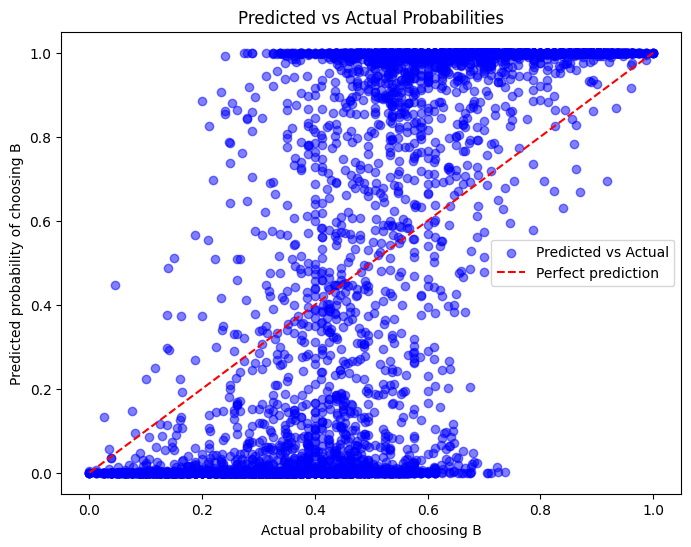

In [30]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the data
A_lotteries, B_lotteries, choiceProbaB = torch.load('./full_data_choices13k.pth')

# Select the first 6000 choice problems
A_lotteries_train = A_lotteries[:6000]
B_lotteries_train = B_lotteries[:6000]
choiceProbaB_train = choiceProbaB[:6000]

# Prepare the data for training
X_train = torch.cat((A_lotteries_train, B_lotteries_train), dim=1)  # 200-dimensional input vector
y_train = (choiceProbaB_train >= 0.5).long()  # Convert bRate to binary class (0 or 1)

# Initialize the model
model = GambleChoiceNN()

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = torch.nn.CrossEntropyLoss()  # Since it's a binary classification problem

# Train the model on the first 6000 choice problems
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(A_lotteries_train, B_lotteries_train)

    # Compute the loss
    loss = loss_function(output, y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# Generate predictions on the training set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = model(A_lotteries_train, B_lotteries_train)
    predicted_probabilities = output[:, 1].cpu().detach()  # Get the probabilities for choosing B

import matplotlib.pyplot as plt

# Convert tensors to lists for plotting
actual_probs = choiceProbaB_train.tolist()  # Convert to list
predicted_probs = predicted_probabilities.tolist()  # Convert to list

# Plot predicted probabilities against actual probabilities
plt.figure(figsize=(8, 6))
plt.scatter(actual_probs, predicted_probs, alpha=0.5, c='blue', label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect prediction')
plt.xlabel('Actual probability of choosing B')
plt.ylabel('Predicted probability of choosing B')
plt.title('Predicted vs Actual Probabilities')
plt.legend()
plt.show()
